In [8]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
iris= load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df= pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [7]:
df0= df[df.target==0]
df1= df[df.target==1]
df2= df[df.target==2]

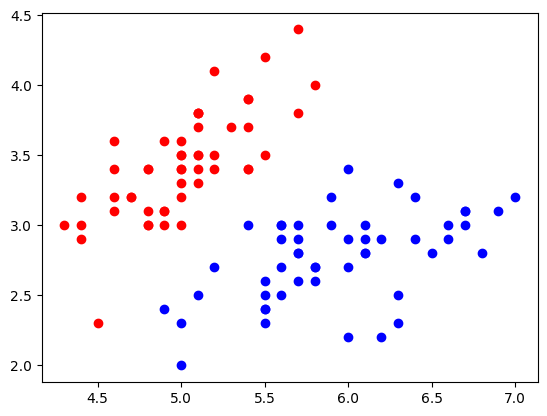

In [9]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='red', label='Setosa')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', label='Versicolor')

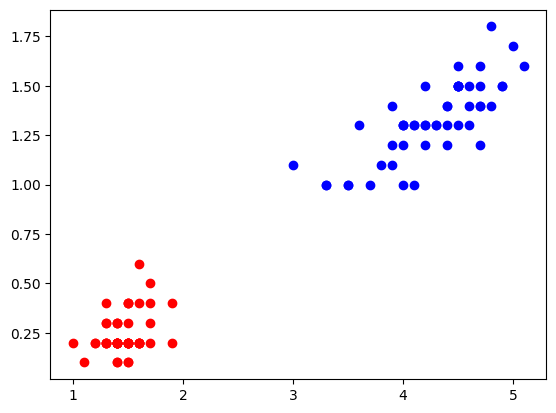

In [10]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='red', label='Setosa')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', label='Versicolor')

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2)

In [13]:
len(x_train), len(x_test), len(y_train), len(y_test)

(120, 30, 120, 30)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [37]:
knn.score(x_test, y_test)

1.0

In [19]:
val=knn.predict([[5.1, 3.5, 1.4, 0.2]])
flower = iris.target_names[knn.predict([[5.1, 3.5, 1.4, 0.2]])[0]]
flower,val

c:\Users\21raj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\21raj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


('setosa', array([0]))

In [41]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
cm= confusion_matrix(y_test, y_pred)
cm

array([[15,  0,  0],
       [ 0,  7,  0],
       [ 0,  0,  8]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

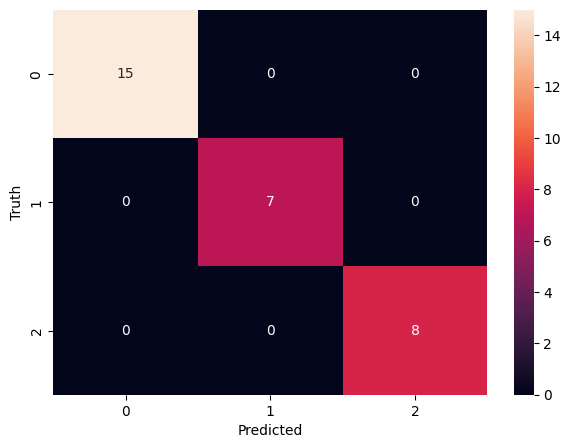

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

